<a href="https://colab.research.google.com/github/dhenneyse/dhenneyse/blob/main/MLP_com_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLP com Keras
* Classificar imagens de roupas de acordo com a analise de imagens

In [2]:
#Bibliotecas
import numpy as np
import matplotlib.pyplot as plt

# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras


In [5]:
#Carregar a base
fashion_mnist = keras.datasets.fashion_mnist
#Train = conjunto de treinamento
#Test = conjunto de testes
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [40]:
#definindo as classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [41]:
train_images.shape
#Existem 60.000 imagens na base com tamanho 28x28 pixels

(60000, 28, 28)

In [42]:
train_labels
#Cada label é um inteiro entre 0 e 9 (que são "nomeadas" com os itens definidos nas classes)

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [43]:
test_images.shape
#O conjunto de testes tem 10.000 itens de tamanho 28x28 pixel.

(10000, 28, 28)

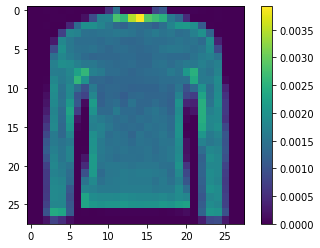

In [44]:
#Pré processamento dos dados
plt.figure()
plt.imshow(train_images[37])
plt.colorbar()
plt.grid(False)
plt.show()
#O valor dos pixels está entre 0 e 255

In [45]:
#Como o valor das imagens tem pixels entre 0 e 255, o conjunto de teste e treinamento deve estar entre 0 e 1. Por isso, dividimos o conjunto por 255.
train_images = train_images/255
test_images = test_images/255

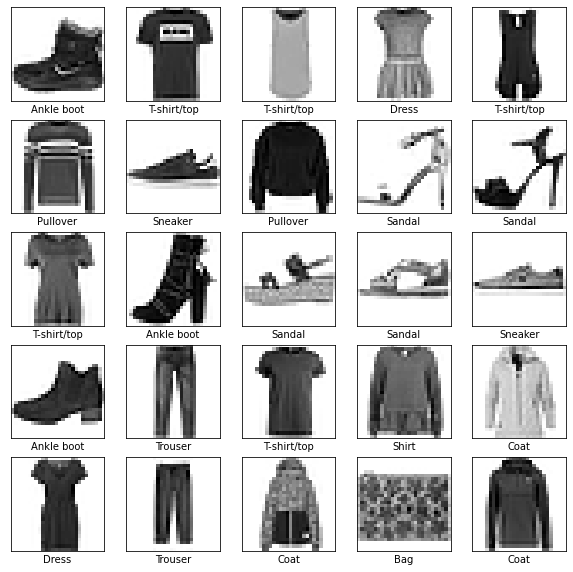

In [46]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [47]:
#Montar as camadas
model = keras.Sequential([
    #Flatten transforma o formato da imagem da array de duas dimensões (28x28) em uma array de uma dimensão (28*28=784)                    
    keras.layers.Flatten(input_shape=(28, 28)),
    #Dense camadas neurais de 128 nós 
    keras.layers.Dense(128, activation='relu'),
    #Dense softmax=camadas neurais de 10 nós, cada um com uma probabilidade da imagem pertencer a uma das classes
    keras.layers.Dense(10, activation='softmax')
])

In [68]:
#compilando o modelo

              #Optimizer = atualização do modelo com base nas informações do loss
model.compile(optimizer='adam', 
              #Loss = mede o quanto o modelo é preciso
               loss='sparse_categorical_crossentropy',
              #Metrics = monitora os resultados de treinamento e teste
              metrics=['accuracy'])

In [118]:
#for i in range (0,50):
  #O processo iniciou com acurácia de aproximadamente 35%. 
  #Percebi que ao chegar na casa de 60%, a acurácia crescia de forma bem mais lenta. Adicionei um for para não precisar interagir tantas vezes.
model.fit(train_images, train_labels, epochs=10)
 #print (i)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6261 - accuracy: 0.7704
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6261 - accuracy: 0.7703
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6260 - accuracy: 0.7703
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6257 - accuracy: 0.7707
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6257 - accuracy: 0.7704
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6258 - accuracy: 0.7698
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6256 - accuracy: 0.7710
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6258 - accuracy: 0.7702
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6255 - accuracy: 0.7697
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.625

In [119]:
#Após treinar o modelo com o conjunto de treinamento, avaliar a acurácia no conjunto de testes

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.6549 - accuracy: 0.7633

Test accuracy: 0.7633000016212463


In [113]:
#Avaliar as predições
predictions = model.predict(test_images)

In [114]:
predictions[0]

array([1.4551397e-09, 9.6050887e-14, 3.5663286e-09, 2.0373030e-09,
       2.4444569e-08, 9.6995823e-02, 4.6565024e-08, 2.4118222e-01,
       9.0543566e-05, 6.6173136e-01], dtype=float32)

In [115]:
np.argmax(predictions[0])

9

In [116]:
test_labels[0]

9

In [120]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

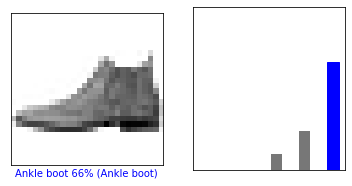

In [121]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

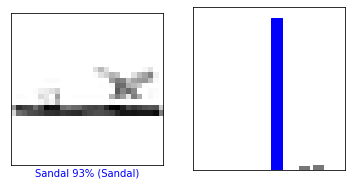

In [125]:
i = 90
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

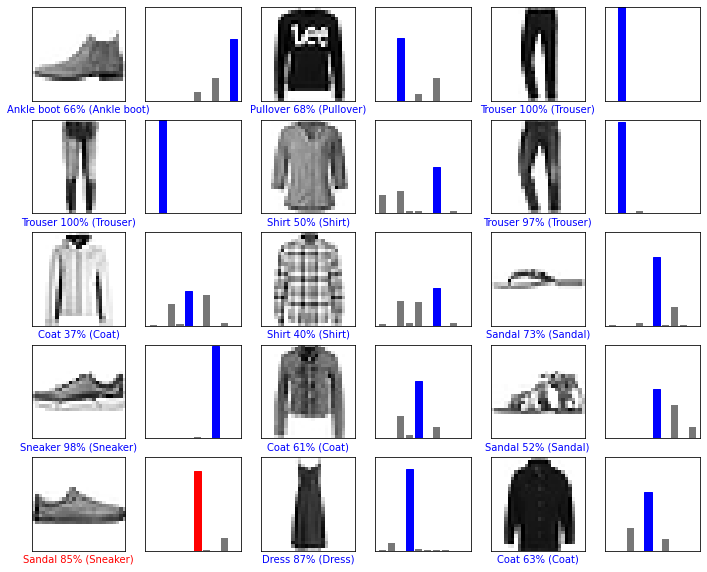

In [126]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [127]:
#Pegar uma imagem teste e verificar a assertividade do modelo
img = test_images[0]

print(img.shape)

(28, 28)


In [128]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [129]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.1356673e-09 6.2354771e-14 3.2911114e-09 1.5943334e-09 2.2743063e-08
  1.0081474e-01 4.4072312e-08 1.9594973e-01 9.6275129e-05 7.0313913e-01]]


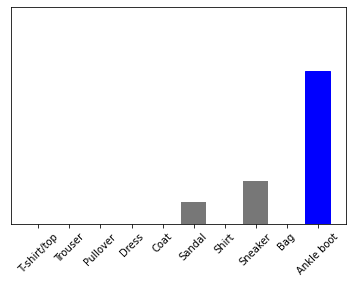

In [130]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [131]:
np.argmax(predictions_single[0])

9